In [35]:
%cd /home/research_dh/project/packages/emulator
%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/research_dh/project/packages/emulator
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:

import torch
from torch import nn
import torchaudio as ta
import librosa as lr
import numpy as np
import os
from IPython.display import Audio
import matplotlib.pyplot as plt
from model import Emulator, Unet
from pairDataset import PairDataset, load_wav, Mel_fn_bigvgan, get_sampler
from utils import get_config, split_mel
from train import train_unet

In [27]:
x = torch.zeros((3, 767, 128))
x = split_mel(x, 256)
print(x.shape)

# expect [3, s, 256, 128]

[3, 2, 256, 128]
torch.Size([3, 2, 256, 128])


In [11]:
input_path = "/home/research_dh/project/data/data/validation/x_50_50_50_50.wav"
wav = load_wav(input_path)

print(wav.dtype)
print(wav.max())
print(wav.shape)

torch.float32
tensor(0.1314)
torch.Size([1340640])


In [31]:
config_path = "/home/research_dh/project/packages/emulator/config_l_v2.json"

h = get_config(config_path)

In [38]:
"""
Test the structure of Unet
"""
device = torch.device('cpu')
model = Unet(h, verbose=True).to(device)

"""
emb = torch.zeros((43, 16, 8)).to(device)

mel_fn_ta = Mel_fn_ta(h.sampling_rate, h.n_fft, h.n_mels, h.hop_size, h.fmin, h.fmax, top_db=h.top_db).to(device)
mel = mel_fn_ta(wav.to(device))

mel = split_mel(mel, h.frame_size)
"""

mel = torch.zeros((256, 128)).to(device)
emb = torch.zeros((4)).to(device)

result = model(mel, emb)
print(result.shape)

FILM layer : 
encoder_ch : []
mid_block_ch : [256, 256]
decoder_ch : []
ch sum : 512


----- Encoder -----

module # 0 : Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=reflect)
input : torch.Size([1, 256, 128])

module # 1 : ReLU(inplace=True)
input : torch.Size([32, 256, 128])

module # 2 : Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=reflect)
input : torch.Size([32, 256, 128])

module # 3 : ReLU(inplace=True)
input : torch.Size([32, 256, 128])

module # 4 : MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
input : torch.Size([32, 256, 128])
skip connection output : torch.Size([32, 256, 128])

module # 5 : Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=reflect)
input : torch.Size([32, 128, 64])

module # 6 : ReLU(inplace=True)
input : torch.Size([64, 128, 64])

module # 7 : Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=ref

In [63]:
# Test for pairDataset

data_path = "/home/research_dh/project/data/data/validation"

mel_fn = Mel_fn_bigvgan(h.sampling_rate, h.n_fft, h.hop_size, h.n_mels, h.fmin, h.fmax)

train_set = PairDataset(data_path, h.frame_size, mel_fn, make_txt_file=False)
print(train_set.__len__())

540


tensor([0.5000, 0.2000, 0.5000, 0.8000])
torch.Size([256, 128])


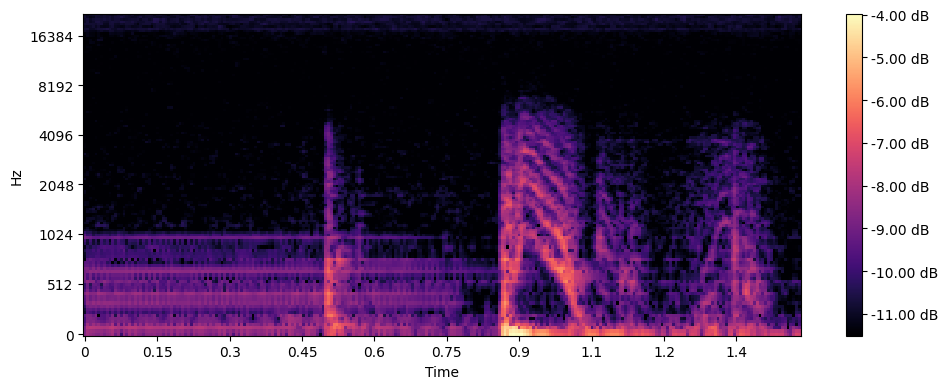

In [64]:
x = train_set[100][0]
emb = train_set[100][2]
print(emb)
print(x.shape)
plt.figure(figsize=(10, 4))
lr.display.specshow(x.T.numpy(), y_axis='mel', sr=h.sampling_rate, hop_length=h.hop_size, x_axis='time', fmin=h.fmin, fmax=h.fmax)
plt.colorbar(format='%+2.2f dB')
plt.tight_layout()
plt.show()

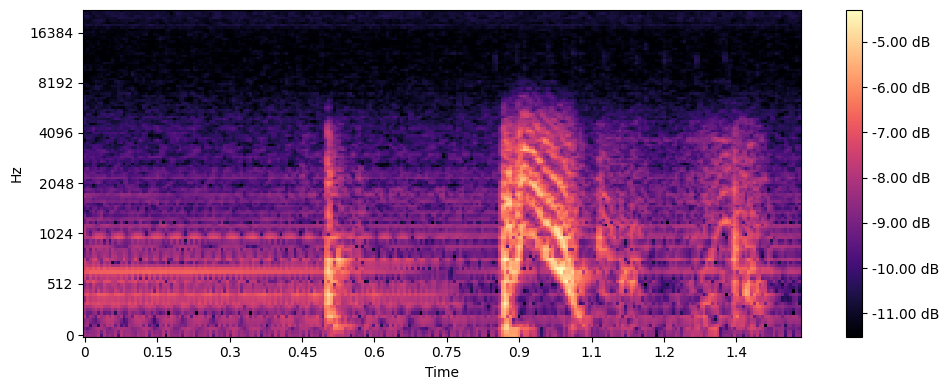

In [65]:
y = train_set[100][1]

plt.figure(figsize=(10, 4))
lr.display.specshow(y.T.numpy(), y_axis='mel', sr=h.sampling_rate, hop_length=h.hop_size, x_axis='time', fmin=h.fmin, fmax=h.fmax)
plt.colorbar(format='%+2.2f dB')
plt.tight_layout()
plt.show()

In [85]:
train_sampler, valid_sampler = get_sampler(train_set, 0.02)
from torch.utils.data import DataLoader
loader = DataLoader(train_set, batch_size=16, sampler=train_sampler)
print(len(loader))
print(len(train_set))

34
540


In [88]:
loader_i = iter(loader)
for i in range(10):
    next(loader_i)
for i, (x, y, e) in enumerate(loader_i):
    print(x.shape)
    print(y.shape)
    print(e.shape)
    print (i)
for i, (x, y, e) in enumerate(loader_i):
    print(i)

torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
0
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
1
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
2
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
3
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
4
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
5
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
6
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
7
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
8
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
9
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
10
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
11
torch.Size([16, 256, 128])
torch.Size([16, 256, 128])
torch.Size([16, 4])
12
torch.Siz

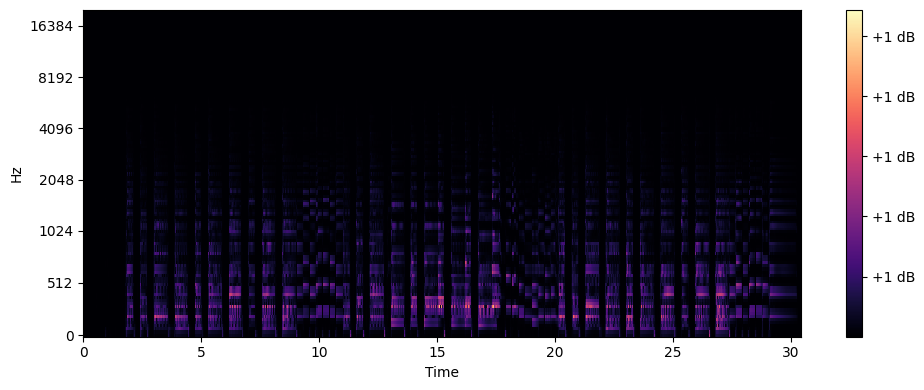

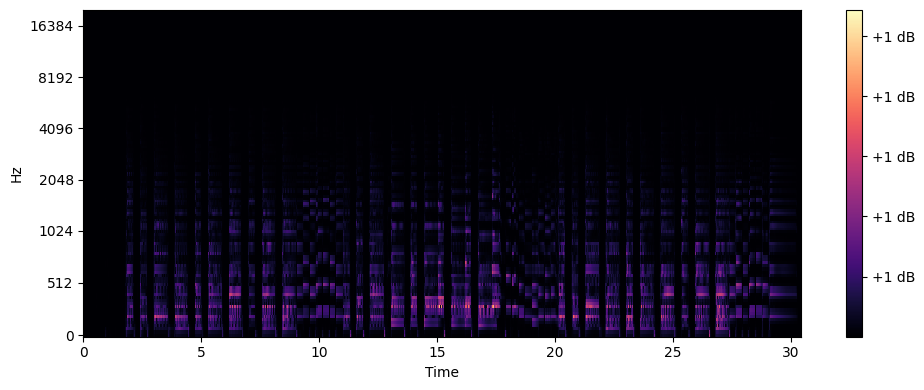

In [9]:
mel_fn = Mel_fn_bigvgan(h.sampling_rate, h.n_fft, h.hop_size, h.n_mels, h.fmin, h.fmax)
mel = mel_fn(wav.unsqueeze(0)).squeeze(0).T.numpy()
plt.figure(figsize=(10, 4))
lr.display.specshow(mel, y_axis='mel', sr=h.sampling_rate, hop_length=h.hop_size, x_axis='time', fmin=h.fmin, fmax=h.fmax)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [11]:
# Test for model training
%cd /home/research_dh/project/packages/emulator
%matplotlib inline
%load_ext autoreload
%autoreload 2
from train import train_unet
from utils import get_config
import argparse
model_name = "test"
config_path = "/home/research_dh/project/packages/emulator/config_l_v2.json"
ckpt_dir = "/home/research_dh/project/ckpt/unet"
data_dir = "/home/research_dh/project/data/data/sum"
log_dir = "/home/research_dh/project/logs/unet"
valid_ratio = "0.02"
epoch = "80"
batch_size = "16"
num_workers = "2"
device = "cuda:0"

parser = argparse.ArgumentParser()
parser.add_argument("--model_name", required=True)
parser.add_argument("--config_path", required=True)
parser.add_argument("--ckpt_dir", required=True)
parser.add_argument("--data_dir", required=True)
parser.add_argument("--log_dir", required=True)
parser.add_argument("--valid_ratio", default=0.02, type=float)
parser.add_argument("--epoch", type=int, default=100)
parser.add_argument("--batch_size", type=int, default=16)
parser.add_argument("--num_workers", type=int, default=4)
parser.add_argument("--device", default="cuda:0")
parser.add_argument("--ignore_prev", action="store_true", default=False)

a = parser.parse_args(["--model_name", model_name, 
                       "--config_path", config_path, 
                       "--ckpt_dir", ckpt_dir, 
                       "--data_dir", data_dir, 
                       "--log_dir", log_dir, 
                       "--valid_ratio", valid_ratio, 
                       "--epoch", epoch, 
                       "--batch_size", batch_size, 
                       "--num_workers", num_workers, 
                       "--device", device, 
                       "--ignore_prev"])

print(f"Model name\t\t: {a.model_name}")
print(f"Configuration path\t: {a.config_path}")
print(f"Ckpt directory\t\t: {a.ckpt_dir}")
print(f"Data path\t\t: {a.data_dir}")
print(f"Log directory\t\t: {a.log_dir}")
print(f"Validation ratio\t: {a.valid_ratio}")
print(f"Epoch\t\t\t: {a.epoch}")
print(f"Batch size\t\t: {a.batch_size}")
print(f"num_workers\t\t: {a.num_workers}")
print(f"Device\t\t\t: {a.device}")
print(f"Ignore previous\ntraining state: {a.ignore_prev}")
print("Continue? y/n")
h = get_config(a.config_path)

train_unet(a, h)

/home/research_dh/project/packages/emulator
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model name		: test
Configuration path	: /home/research_dh/project/packages/emulator/config_l_v2.json
Ckpt directory		: /home/research_dh/project/ckpt/unet
Data path		: /home/research_dh/project/data/data/sum
Log directory		: /home/research_dh/project/logs/unet
Validation ratio	: 0.02
Epoch			: 80
Batch size		: 16
num_workers		: 2
Device			: cuda:0
Ignore previous
training state: True
Continue? y/n
Model name: test
Loading dataset...
Training dataset 	: 6959 frames
Validation dataset 	: 142 frames
Creating ckpt at /home/research_dh/project/ckpt/unet/test.ckpt
Ckpt saved.


Epoch 0: 100%|██████████| 435/435 [02:41<00:00,  2.70it/s]


Checkpoint saved

took 00h 03m 49.24s
Training error : 0.0661760425709808
Validation error : 0.10313938285263491



Epoch 1:  37%|███▋      | 161/435 [01:01<01:44,  2.63it/s]


KeyboardInterrupt: 

In [81]:
from bigvgan.meldataset import mel_spectrogram
mel_fn = Mel_fn_bigvgan(h.sampling_rate, h.n_fft, h.hop_size, h.n_mels, h.fmin, h.fmax)

mel_ref = mel_spectrogram(wav.unsqueeze(0),  h.n_fft, h.n_mels, h.sampling_rate, h.hop_size, h.n_fft, h.fmin, h.fmax).squeeze(0)
mel = mel_fn(wav.unsqueeze(0)).squeeze(0).T

In [82]:
print(mel.shape)
print(mel_ref.shape)

torch.Size([128, 5236])
torch.Size([128, 5236])


In [83]:
err = mel - mel_ref

In [84]:
print(err)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [66]:
def ftime(sec):
    mil = sec % 1
    s = int(sec % 60)
    m = int(sec // 60)
    h = m // 60
    m = m % 60
    return "{:02d}h {:02d}m {:02d}.".format(h, m, s) + str.split("{:.2f}".format(mil), '.')[1] + "s"

h = 12394
m = 53
s = 51.3
t = h * 3600 + m * 60 + s
print(ftime(t))

12394h 53m 51.30s


In [ ]:
from tqdm import tqdm
from time import sleep

for i, x in enumerate(tqdm(range(10), initial=3)):
    sleep(1)

In [11]:

for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
